In [1]:
# 분석용 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataPath = 'D:\\Data\\LGAI_AutoDriveSensors\\'

#import train and test CSV files
train = pd.read_csv(dataPath+'train.csv')
test = pd.read_csv(dataPath+"test.csv")

In [3]:
# 데이터의 차원
train.shape
#(39607,71)
# -> ID컬럼(1개) + X 컬럼(56개)+ Y 컬럼(14개) 
# = 총 71개의 컬럼이 39607개의 행으로 이루어져 있다.
# 반환되는 형태는 튜플이다

(39607, 71)

In [4]:
# 데이터 앞에서 5개의 행 출력
train.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [6]:
# 각 데이터의 개수(count), 중복여부(unique), 가장 위 데이터(top), 빈도수(freq), 평균(mean), 표준편차(std), 최소값(min), 4분위(25%,50%,75%), 최대값(max)확인
train.describe(include='all')

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
unique,39607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TRAIN_00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,...,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,NaN,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,...,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,NaN,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,...,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,NaN,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,...,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,NaN,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,...,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,NaN,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,...,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000


In [7]:
# 데이터의 이름, NULL값과 타입을 확인 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39607 non-null  object 
 1   X_01    39607 non-null  float64
 2   X_02    39607 non-null  float64
 3   X_03    39607 non-null  float64
 4   X_04    39607 non-null  int64  
 5   X_05    39607 non-null  float64
 6   X_06    39607 non-null  float64
 7   X_07    39607 non-null  float64
 8   X_08    39607 non-null  float64
 9   X_09    39607 non-null  float64
 10  X_10    39607 non-null  float64
 11  X_11    39607 non-null  float64
 12  X_12    39607 non-null  float64
 13  X_13    39607 non-null  float64
 14  X_14    39607 non-null  float64
 15  X_15    39607 non-null  float64
 16  X_16    39607 non-null  float64
 17  X_17    39607 non-null  float64
 18  X_18    39607 non-null  float64
 19  X_19    39607 non-null  float64
 20  X_20    39607 non-null  float64
 21  X_21    39607 non-null  float64
 22

---

X_01 PCB 체결 시 단계별 누름량(Step 1)

In [8]:
# PCB 체결 시 단계별 누름량(Step 1)
X_01_df = train.loc[:,'X_01']
X_01_df.describe()
# 첫번째 스탭인  PCB 체결 시 단계별 누름량(Step 1) 은 표준편차가 2.6 상대적으로 평균인 68에서 큰 차이가 발생하지 않는다

count    39607.000000
mean        68.412040
std          2.655983
min         56.268000
25%         66.465000
50%         68.504000
75%         69.524000
max         84.820000
Name: X_01, dtype: float64

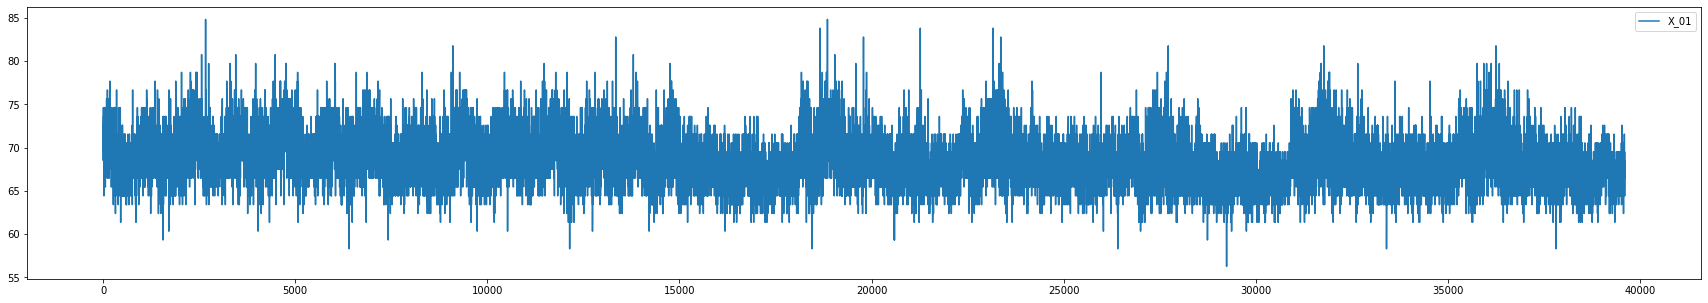

In [9]:
# 행별 누름량
plt.figure(figsize=(30,5))
plt.plot(X_01_df, label='X_01') 
plt.legend()
plt.show()

---
X_02 PCB 체결 시 단계별 누름량(Step 2)

In [10]:
# PCB 체결 시 단계별 누름량(Step 2)
X_02_df = train.loc[:,'X_02']
X_02_df.describe()
# 두번째 스탭인  PCB 체결 시 단계별 누름량(Step 2) 은 표준편차가 0.000372로 데이터 전체로 보아도 거의 차이가 없다.

count    39607.000000
mean       103.320166
std          0.000372
min        103.320000
25%        103.320000
50%        103.320000
75%        103.320000
max        103.321000
Name: X_02, dtype: float64

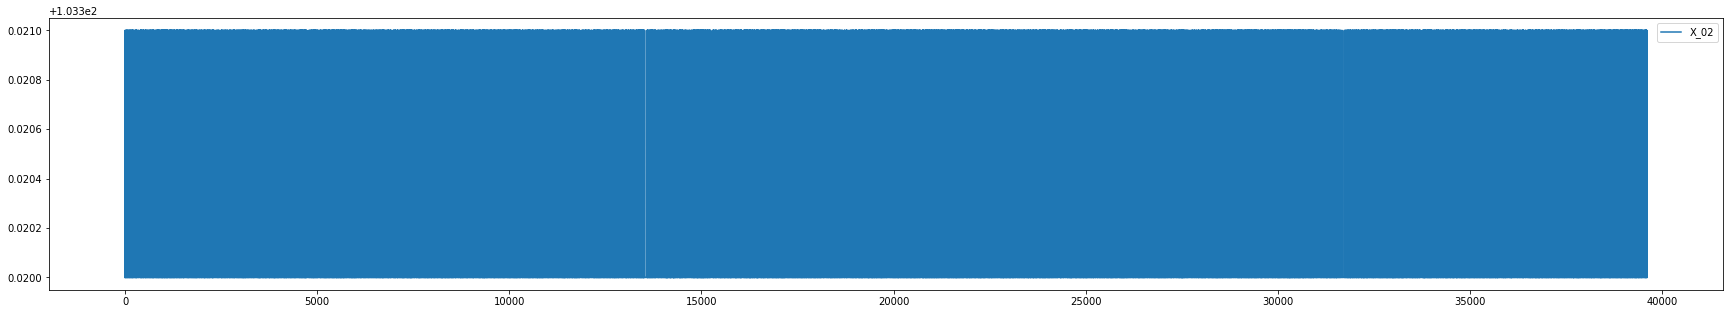

In [11]:
plt.figure(figsize=(30,5))
plt.plot(X_02_df, label='X_02') 
plt.legend()
plt.show()
# 그래프가 꽉차보이는 것은 모든 데이터의 편차가 거의 없기 때문이다.

---
X_03 방열 재료 1 무게

In [12]:
# 방열 재료 1 무게
X_03_df = train.loc[:,'X_03']
X_03_df.describe()

count    39607.000000
mean        68.826354
std          5.151167
min         56.470000
25%         65.070000
50%         67.270000
75%         71.770000
max         89.170000
Name: X_03, dtype: float64

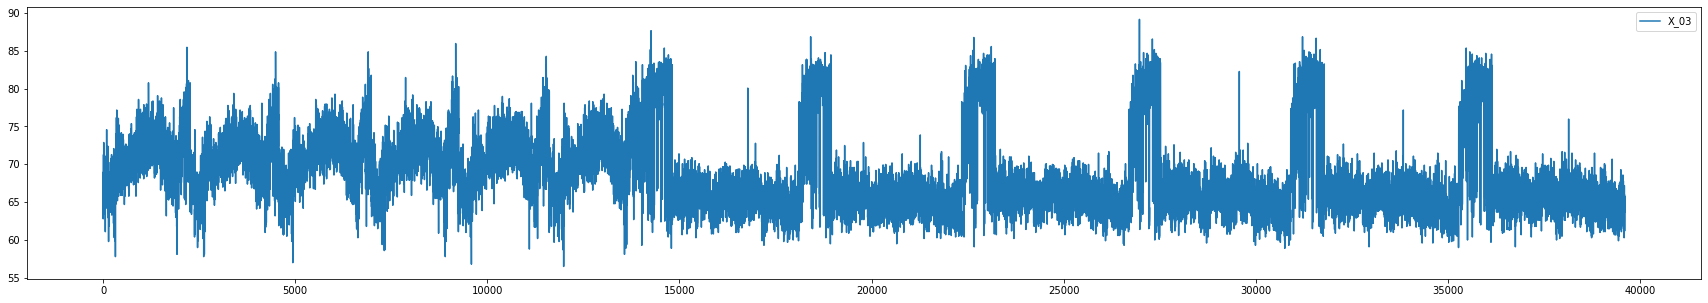

In [13]:
# 방열 재료 1 무게
plt.figure(figsize=(30,5))
plt.plot(X_03_df, label='X_03') 
plt.legend()
plt.show()
# 일정주기별로 발열이 세지는 구간이 있다.

---
X_04 1차 검사 통과 여부

In [14]:
# 1차 검사 통과 여부
X_04_df = train.loc[:,'X_04']
X_04_df.describe()
# 모두 1.0 >> 통과를 못한 제품은 39607개의 데이터중 하나도 없다

count    39607.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: X_04, dtype: float64

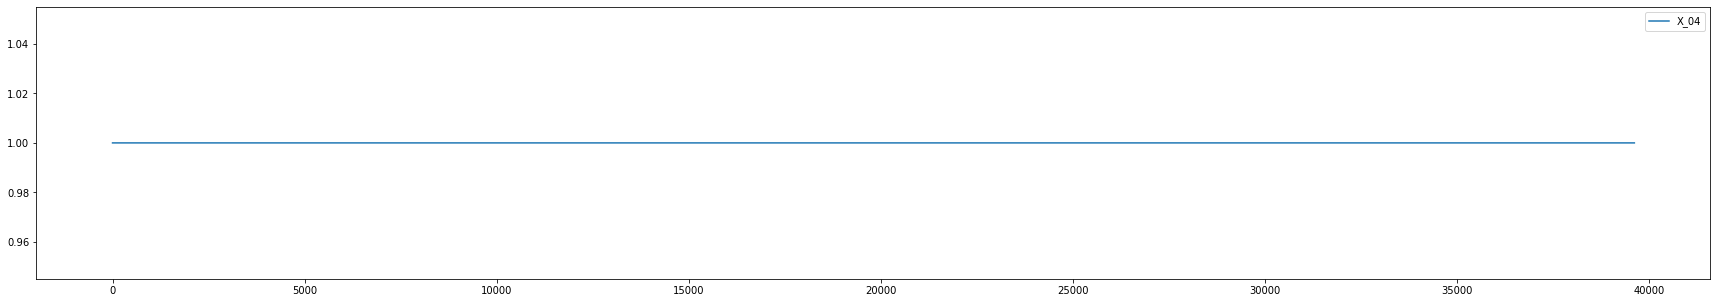

In [15]:
# 1차 검사 통과 여부
plt.figure(figsize=(30,5))
plt.plot(X_04_df, label='X_04') 
plt.legend()
plt.show()

---
X_05 PCB 체결 시 단계별 누름량(Step 3)

In [16]:
# PCB 체결 시 단계별 누름량(Step 3)
X_05_df = train.loc[:,'X_05']
X_05_df.describe()

count    39607.000000
mean       102.337203
std          0.548353
min        101.774000
25%        101.949000
50%        102.006000
75%        103.144000
max        103.160000
Name: X_05, dtype: float64

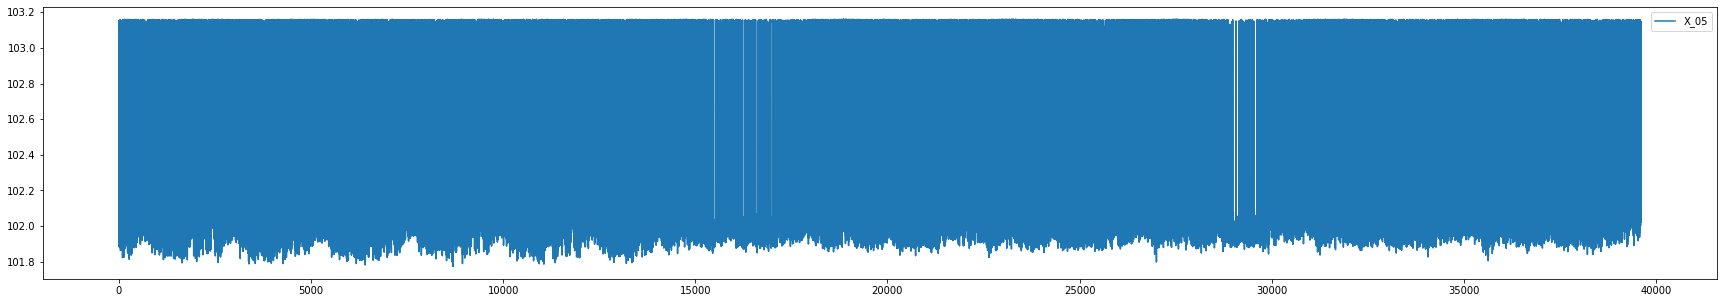

In [17]:
# PCB 체결 시 단계별 누름량(Step 3)
plt.figure(figsize=(30,5))
plt.plot(X_05_df, label='X_05') 
plt.legend()
plt.show()
# 아래 그래프는 편차가 매우 작을때 발생하는 그래프, 공정의 수준이 매우높아 편차가 작다고 해석된다.

---
X_06 PCB 체결 시 단계별 누름량(Step 4)

In [18]:
# PCB 체결 시 단계별 누름량(Step 4)
X_06_df = train.loc[:,'X_06']
X_06_df.describe()

count    39607.000000
mean        70.597211
std          2.259820
min         61.726000
25%         68.864000
50%         69.884000
75%         71.923000
max         87.219000
Name: X_06, dtype: float64

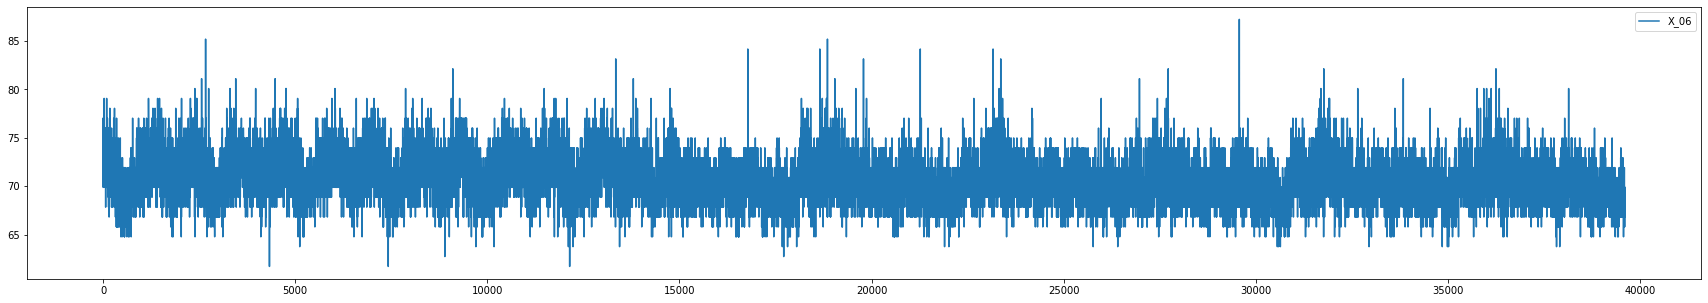

In [19]:
# PCB 체결 시 단계별 누름량(Step 3)
plt.figure(figsize=(30,5))
plt.plot(X_06_df, label='X_06') 
plt.legend()
plt.show()
# 일부 특이하게 튀는 이상치가 있다.

(array([2.9000e+01, 5.3500e+02, 1.1288e+04, 2.0360e+04, 5.4190e+03,
        1.5860e+03, 3.4900e+02, 2.7000e+01, 1.1000e+01, 3.0000e+00]),
 array([61.726 , 64.2753, 66.8246, 69.3739, 71.9232, 74.4725, 77.0218,
        79.5711, 82.1204, 84.6697, 87.219 ]),
 <BarContainer object of 10 artists>)

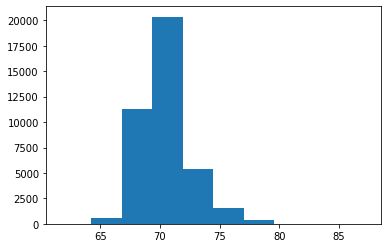

In [20]:
plt.hist(X_06_df)

---
X_07 08 09 방열 재료 면적

In [72]:
X_07_df = train.loc[:,'X_07']
X_08_df = train.loc[:,'X_08']
X_09_df = train.loc[:,'X_09']

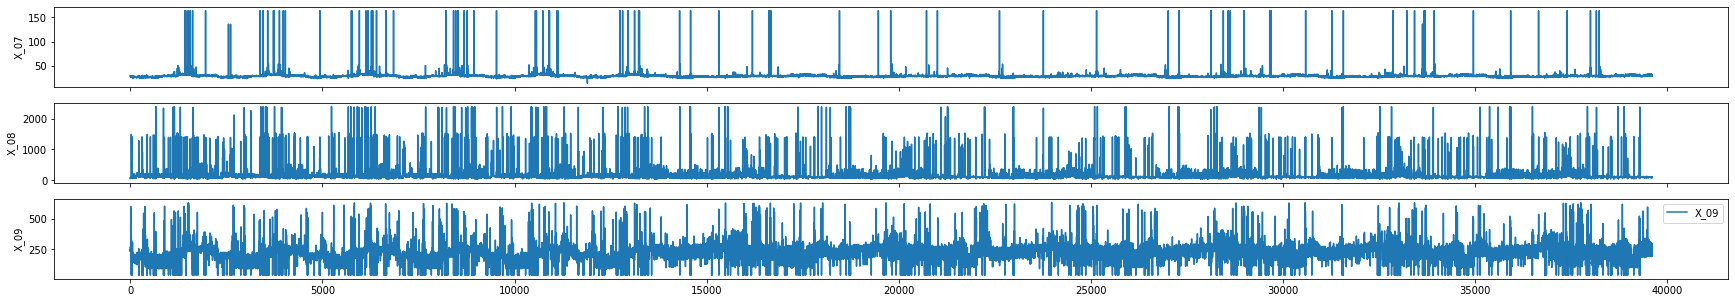

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,5), sharex=True)

ax1.plot(X_07_df)
ax1.set_ylabel('X_07')
ax2.plot(X_08_df)
ax2.set_ylabel('X_08')
ax3.plot(X_09_df, label='X_09')
ax3.set_ylabel('X_09')

plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

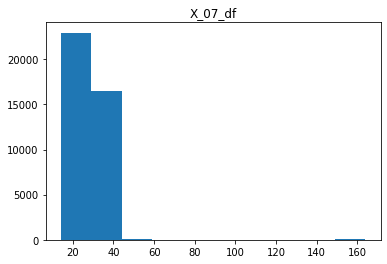

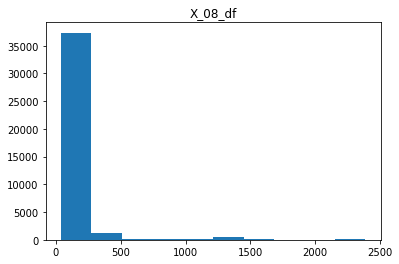

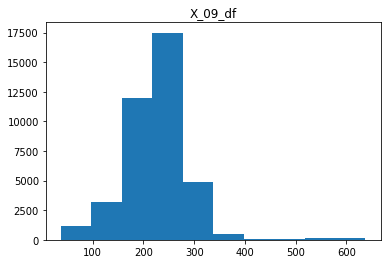

<Figure size 432x288 with 0 Axes>

In [76]:
plt.hist(X_07_df)
plt.title('X_07_df')
plt.figure()

plt.hist(X_08_df)
plt.title('X_08_df')
plt.figure()

plt.hist(X_09_df)
plt.title('X_09_df')
plt.figure()

plt.show()
# 7 : 대다수 20~40 사이에 값이 분포하지만 160까지 값이 튀는 경우가 꽤 있음 (편차가 크다)
# 8 : 주로 0부터 500사이에 값이 분포하지만, 2300 단위까지 값이 튀는 게 많이 있다.
# 9 : 편차 66으로 큰 편. 주로 100에서 300사이에 값이 많이 분포한다.

In [77]:
# 여러 히스토그램 겹쳐서 그리기
#plt.hist(X_07_df, alpha = 0.5, label='7')
#plt.hist(X_08_df, alpha = 0.5, label='8')
#plt.hist(X_09_df, alpha = 0.5, label='9')

#plt.legend()
#plt.show()


---
X_10 11 방열 재료 무게

In [78]:
X_10_df = train.loc[:,'X_10']
X_11_df = train.loc[:,'X_11']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


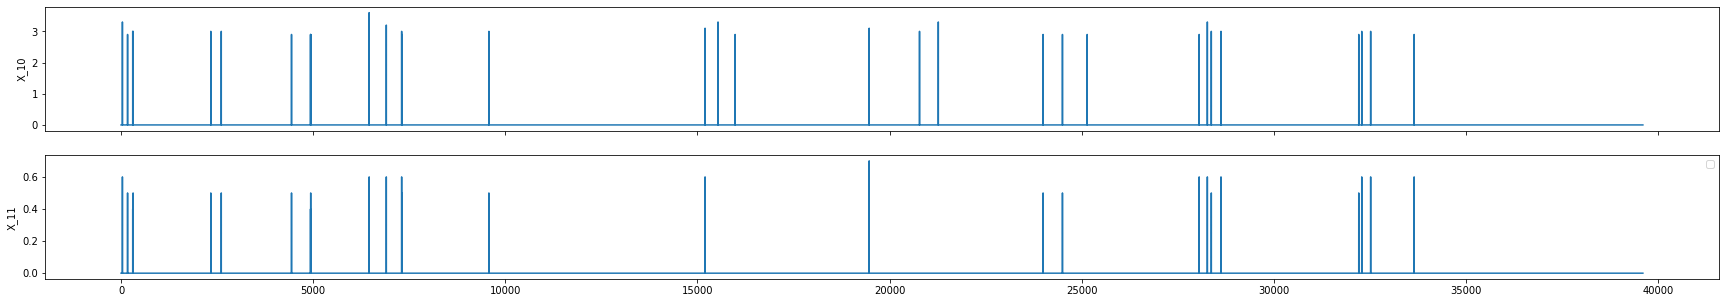

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,5), sharex=True)

ax1.plot(X_10_df)
ax1.set_ylabel('X_10')
ax2.plot(X_11_df)
ax2.set_ylabel('X_11')


plt.legend()
plt.show()

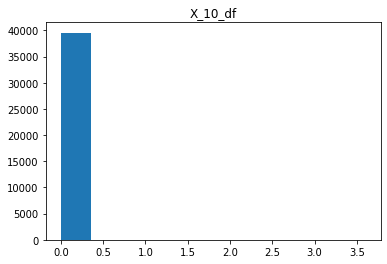

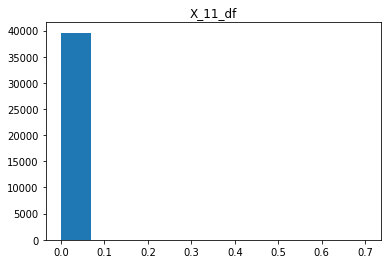

<Figure size 432x288 with 0 Axes>

In [81]:
plt.hist(X_10_df)
plt.title('X_10_df')
plt.figure()

plt.hist(X_11_df)
plt.title('X_11_df')
plt.figure()

plt.show()
# 10 : 대부분 0, 일부 값만 3.0 이상으로 튄다.
# 11 : 대부분 0, 일부 값만 3.0 이상으로 튄다. 2 무게에서 튀는 위치와 유사함

---
X_12 커넥터 위치 기준 좌표

In [39]:
# X_12 커넥터 위치 기준 좌표
X_12_df = train.loc[:,'X_12']
X_12_df.describe()

count    39607.000000
mean         4.373228
std          0.021806
min          4.270000
25%          4.360000
50%          4.370000
75%          4.390000
max          4.490000
Name: X_12, dtype: float64

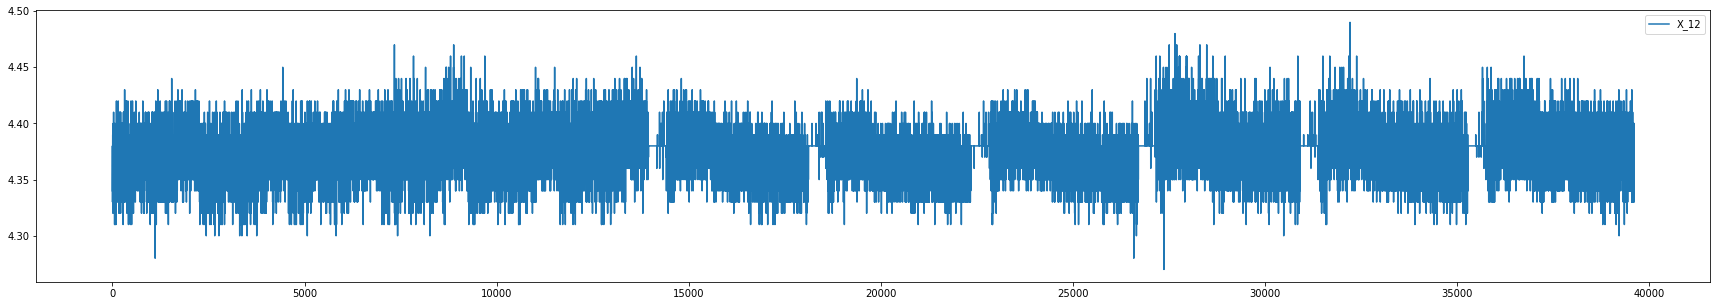

In [40]:
plt.figure(figsize=(30,5))
plt.plot(X_12_df, label='X_12') 
plt.legend()
plt.show()

(array([3.0000e+00, 1.3900e+02, 1.4270e+03, 6.6990e+03, 1.1811e+04,
        1.6768e+04, 2.3180e+03, 3.8600e+02, 4.8000e+01, 8.0000e+00]),
 array([4.27 , 4.292, 4.314, 4.336, 4.358, 4.38 , 4.402, 4.424, 4.446,
        4.468, 4.49 ]),
 <BarContainer object of 10 artists>)

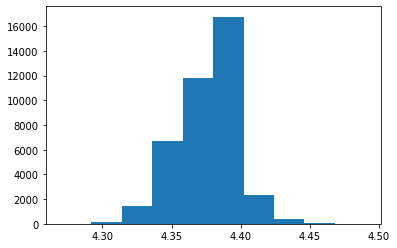

In [41]:
plt.hist(X_12_df)
# 

---
X_13 각 안테나 패드 위치(높이) 차이

In [82]:
X_13_df = train.loc[:,'X_13']
X_13_df.describe()

count    39607.000000
mean         0.143335
std          0.025334
min          0.050000
25%          0.130000
50%          0.140000
75%          0.160000
max          0.280000
Name: X_13, dtype: float64

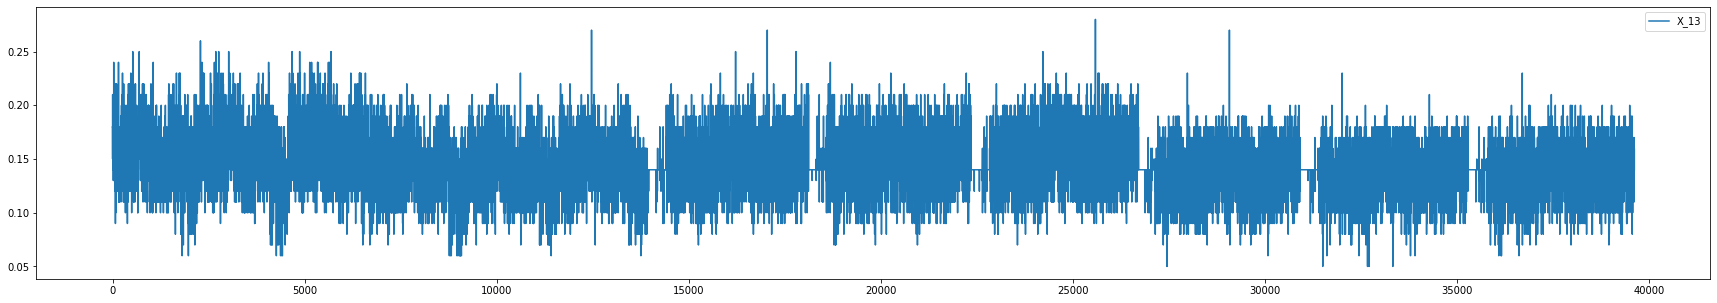

In [83]:
plt.figure(figsize=(30,5))
plt.plot(X_13_df, label='X_13') 
plt.legend()
plt.show()

(array([1.1400e+02, 8.5100e+02, 4.0200e+03, 1.7399e+04, 9.9210e+03,
        5.1020e+03, 2.0110e+03, 1.5600e+02, 2.8000e+01, 5.0000e+00]),
 array([0.05 , 0.073, 0.096, 0.119, 0.142, 0.165, 0.188, 0.211, 0.234,
        0.257, 0.28 ]),
 <BarContainer object of 10 artists>)

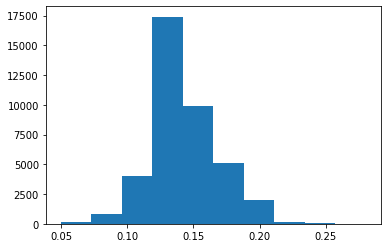

In [84]:
plt.hist(X_13_df)
# 

---
X_14 ~ X_18 안테나 패드 위치

In [85]:
X_14_df = train.loc[:,'X_14']
X_15_df = train.loc[:,'X_15']
X_16_df = train.loc[:,'X_16']
X_17_df = train.loc[:,'X_17']
X_18_df = train.loc[:,'X_18']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


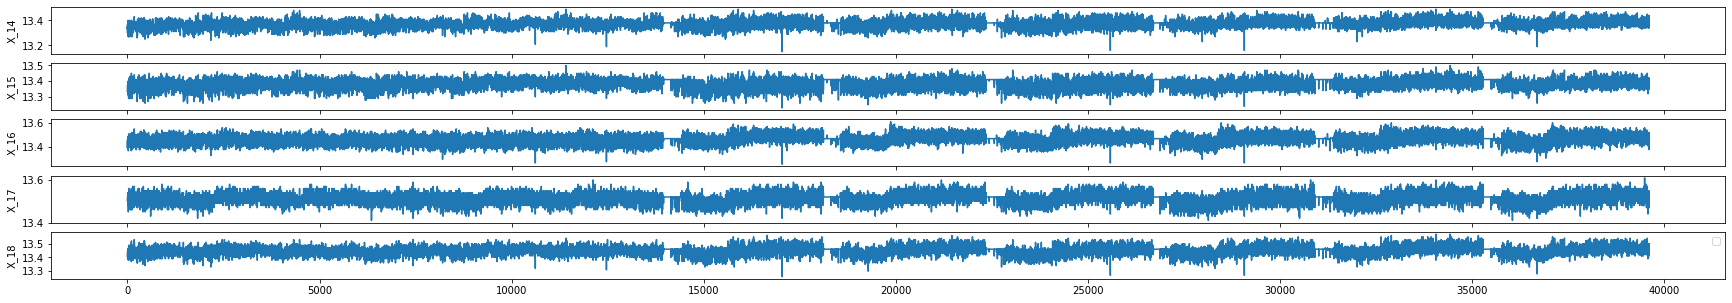

In [87]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(30,5), sharex=True)

ax1.plot(X_14_df)
ax1.set_ylabel('X_14')
ax2.plot(X_15_df)
ax2.set_ylabel('X_15')
ax3.plot(X_16_df)
ax3.set_ylabel('X_16')
ax4.plot(X_17_df)
ax4.set_ylabel('X_17')
ax5.plot(X_18_df)
ax5.set_ylabel('X_18')

plt.legend()
plt.show()

---
X_19 ~ X_22 스크류 삽잎 깊이

In [101]:
X_19_df = train.loc[:,'X_19']
X_20_df = train.loc[:,'X_20']
X_21_df = train.loc[:,'X_21']
X_22_df = train.loc[:,'X_22']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


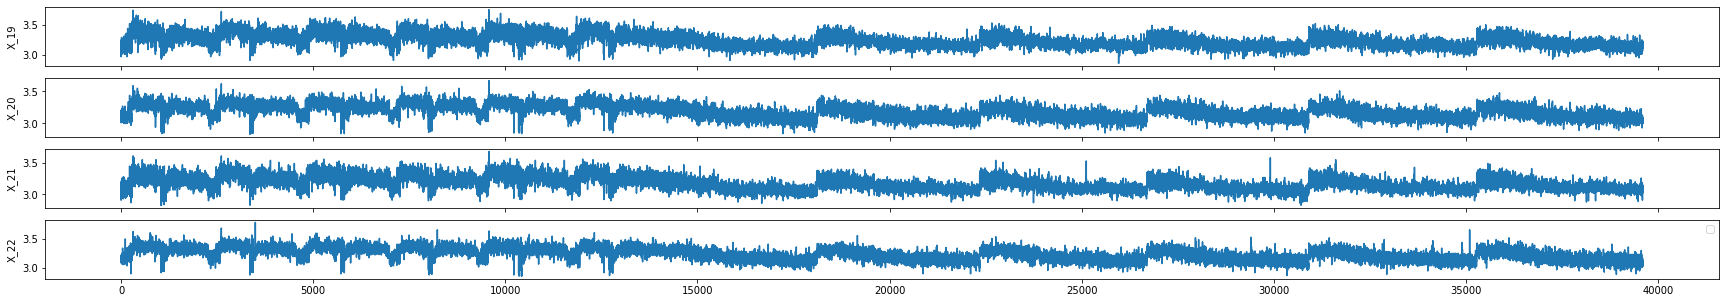

In [103]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30,5), sharex=True)

ax1.plot(X_19_df)
ax1.set_ylabel('X_19')
ax2.plot(X_20_df)
ax2.set_ylabel('X_20')
ax3.plot(X_21_df)
ax3.set_ylabel('X_21')
ax4.plot(X_22_df)
ax4.set_ylabel('X_22')

plt.legend()
plt.show()

#X_19 ~ X_22 거의 유사한 양상을 보인다.

---
X_23 2차 검사 통과 여부

In [104]:
X_23_df = train.loc[:,'X_23']
X_23_df.describe()

count    39607.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: X_23, dtype: float64

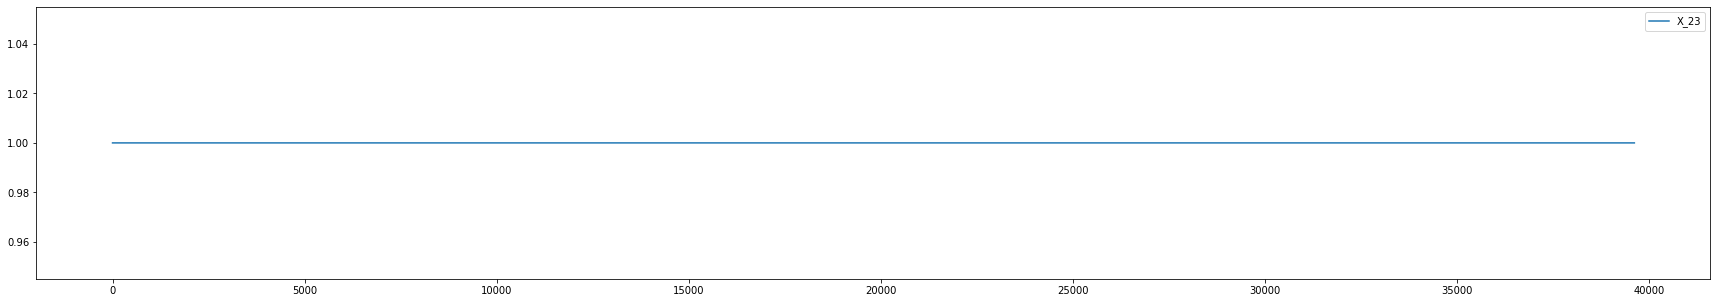

In [105]:
plt.figure(figsize=(30,5))
plt.plot(X_23_df, label='X_23') 
plt.legend()
plt.show()
# 전부 통과함

---
X_24 ~ X_29 커넥터 핀 치수

In [106]:
X_24_df = train.loc[:,'X_24']
X_25_df = train.loc[:,'X_25']
X_26_df = train.loc[:,'X_26']
X_27_df = train.loc[:,'X_27']
X_28_df = train.loc[:,'X_28']
X_29_df = train.loc[:,'X_29']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


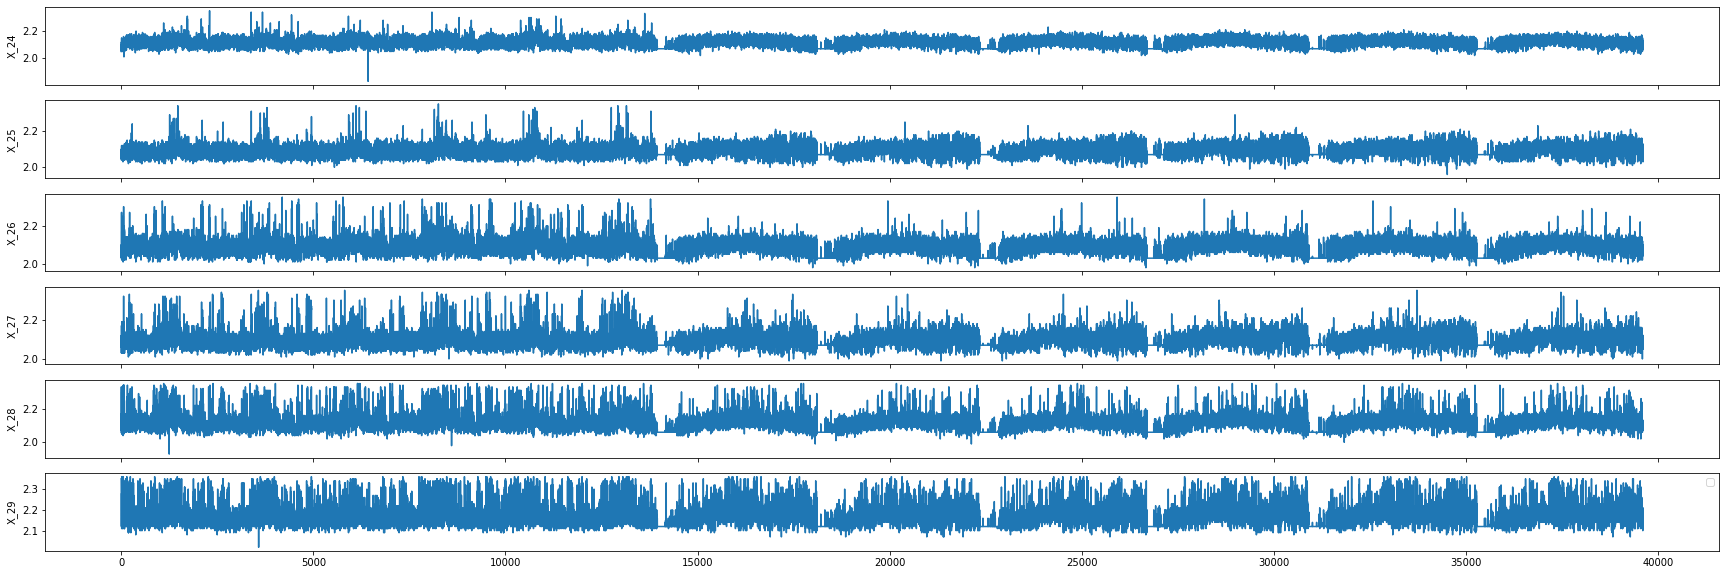

In [111]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(30,10), sharex=True)

ax1.plot(X_24_df)
ax1.set_ylabel('X_24')
ax2.plot(X_25_df)
ax2.set_ylabel('X_25')
ax3.plot(X_26_df)
ax3.set_ylabel('X_26')
ax4.plot(X_27_df)
ax4.set_ylabel('X_27')
ax5.plot(X_28_df)
ax5.set_ylabel('X_28')
ax6.plot(X_29_df)
ax6.set_ylabel('X_29')

plt.legend()
plt.show()


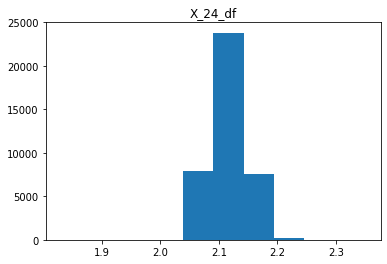

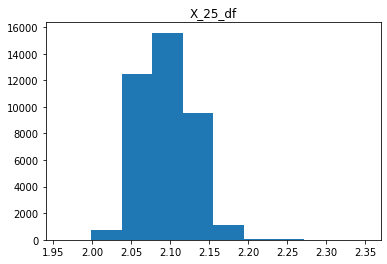

<Figure size 432x288 with 0 Axes>

In [112]:
plt.hist(X_24_df)
plt.title('X_24_df')
plt.figure()

plt.hist(X_25_df)
plt.title('X_25_df')
plt.figure()

plt.show()
# 편차가 크지 않아 대부분 2.1 대에 몰려있다.

---
X_30 ~ X_33 스크류 삽입 깊이

In [121]:
X_30_df = train.loc[:,'X_30']
X_31_df = train.loc[:,'X_31']
X_32_df = train.loc[:,'X_32']
X_33_df = train.loc[:,'X_33']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


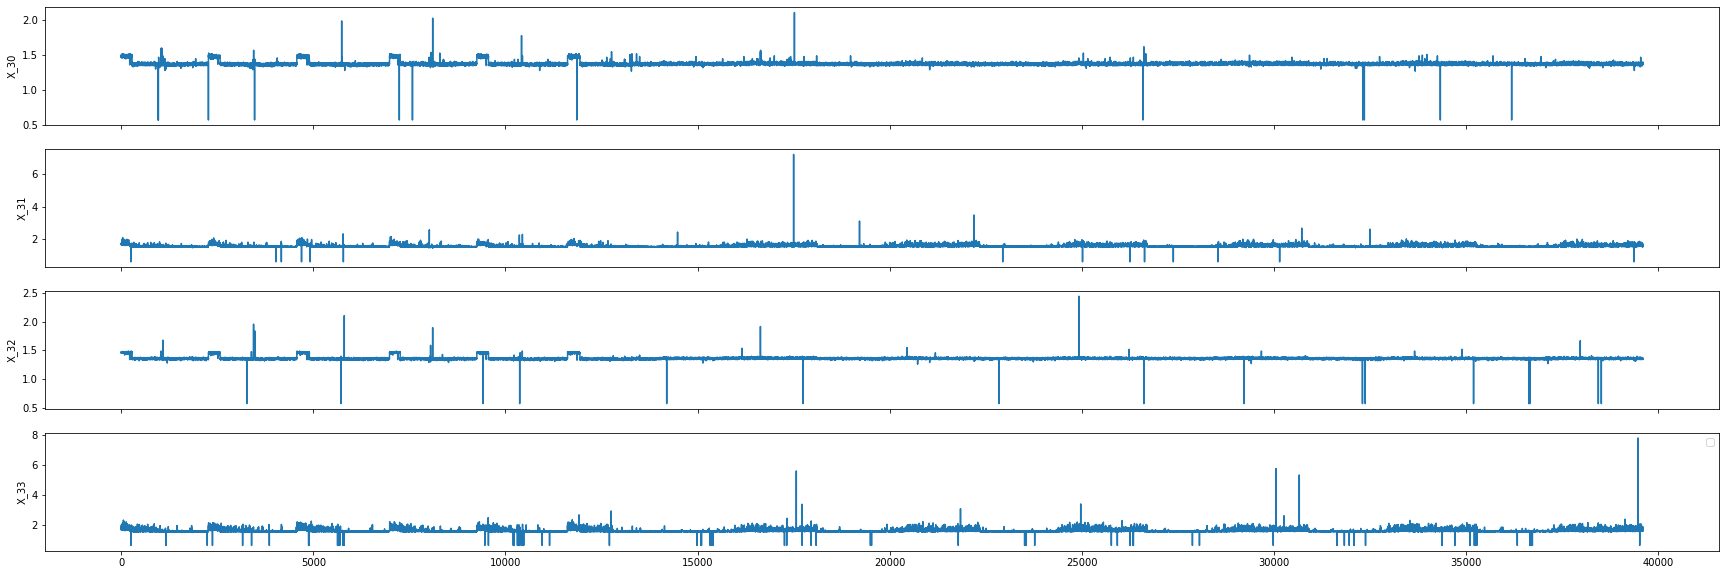

In [114]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30,10), sharex=True)

ax1.plot(X_30_df)
ax1.set_ylabel('X_30')
ax2.plot(X_31_df)
ax2.set_ylabel('X_31')
ax3.plot(X_32_df)
ax3.set_ylabel('X_32')
ax4.plot(X_33_df)
ax4.set_ylabel('X_33')

plt.legend()
plt.show()

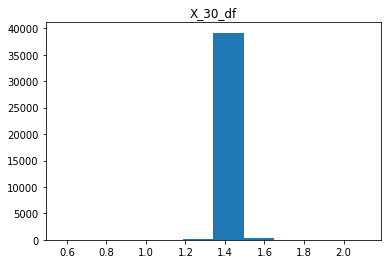

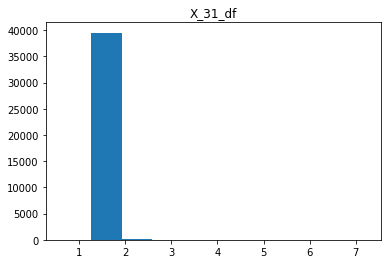

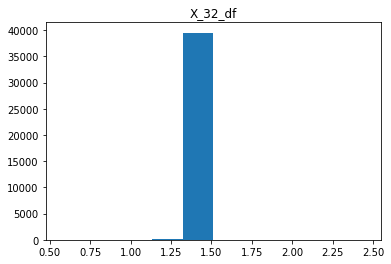

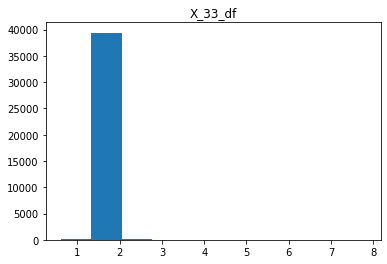

<Figure size 432x288 with 0 Axes>

In [115]:
plt.hist(X_30_df)
plt.title('X_30_df')
plt.figure()

plt.hist(X_31_df)
plt.title('X_31_df')
plt.figure()

plt.hist(X_32_df)
plt.title('X_32_df')
plt.figure()


plt.hist(X_33_df)
plt.title('X_33_df')
plt.figure()


plt.show()
# 편차가 크지 않음. 하지만 특정 부분에서 튀는 이상값 있다.

---
X_34 ~ X_37 스크류 체결 시 분당 회전수

In [122]:
X_34_df = train.loc[:,'X_34']
X_35_df = train.loc[:,'X_35']
X_36_df = train.loc[:,'X_36']
X_37_df = train.loc[:,'X_37']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


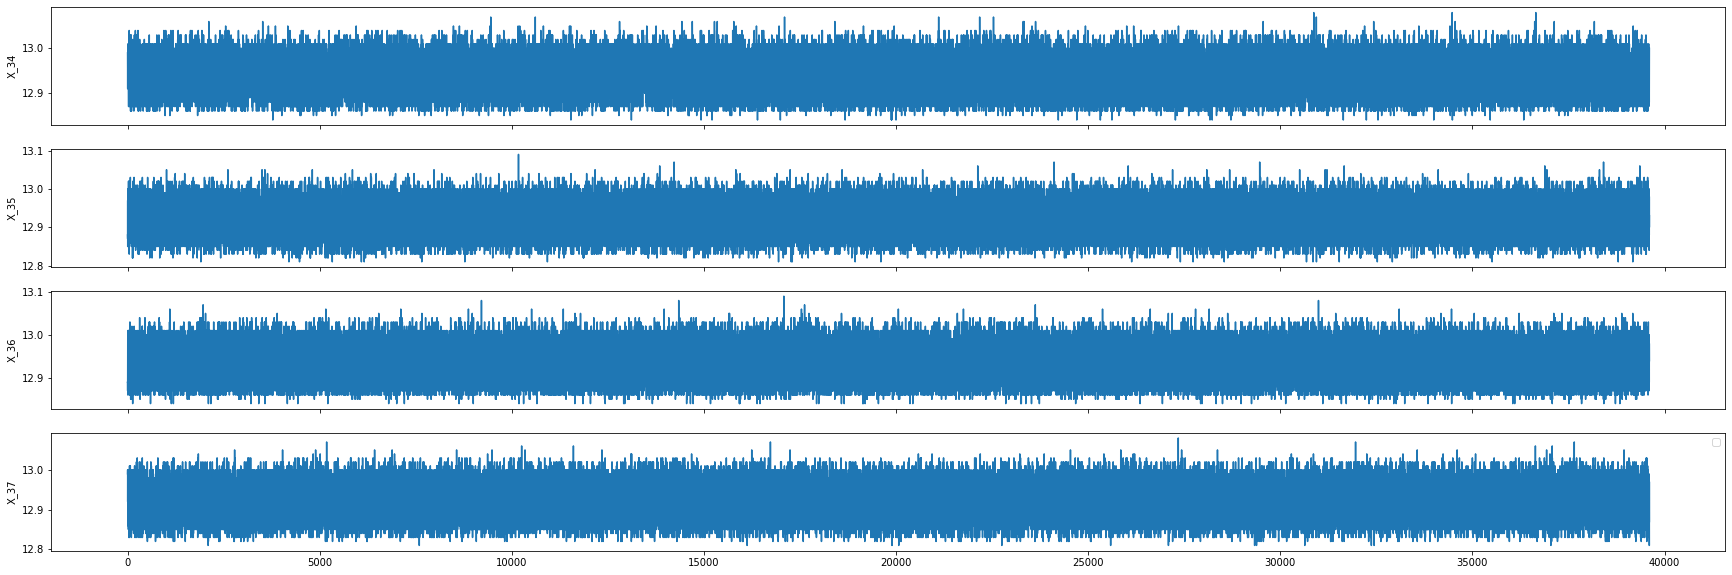

In [123]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30,10), sharex=True)

ax1.plot(X_34_df)
ax1.set_ylabel('X_34')
ax2.plot(X_35_df)
ax2.set_ylabel('X_35')
ax3.plot(X_36_df)
ax3.set_ylabel('X_36')
ax4.plot(X_37_df)
ax4.set_ylabel('X_37')

plt.legend()
plt.show()
# 거의 다 12.9로 유사함

---
X_38 ~ X_40 하우징 PCB 안착부 치수

In [124]:
X_38_df = train.loc[:,'X_38']
X_39_df = train.loc[:,'X_39']
X_40_df = train.loc[:,'X_40']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


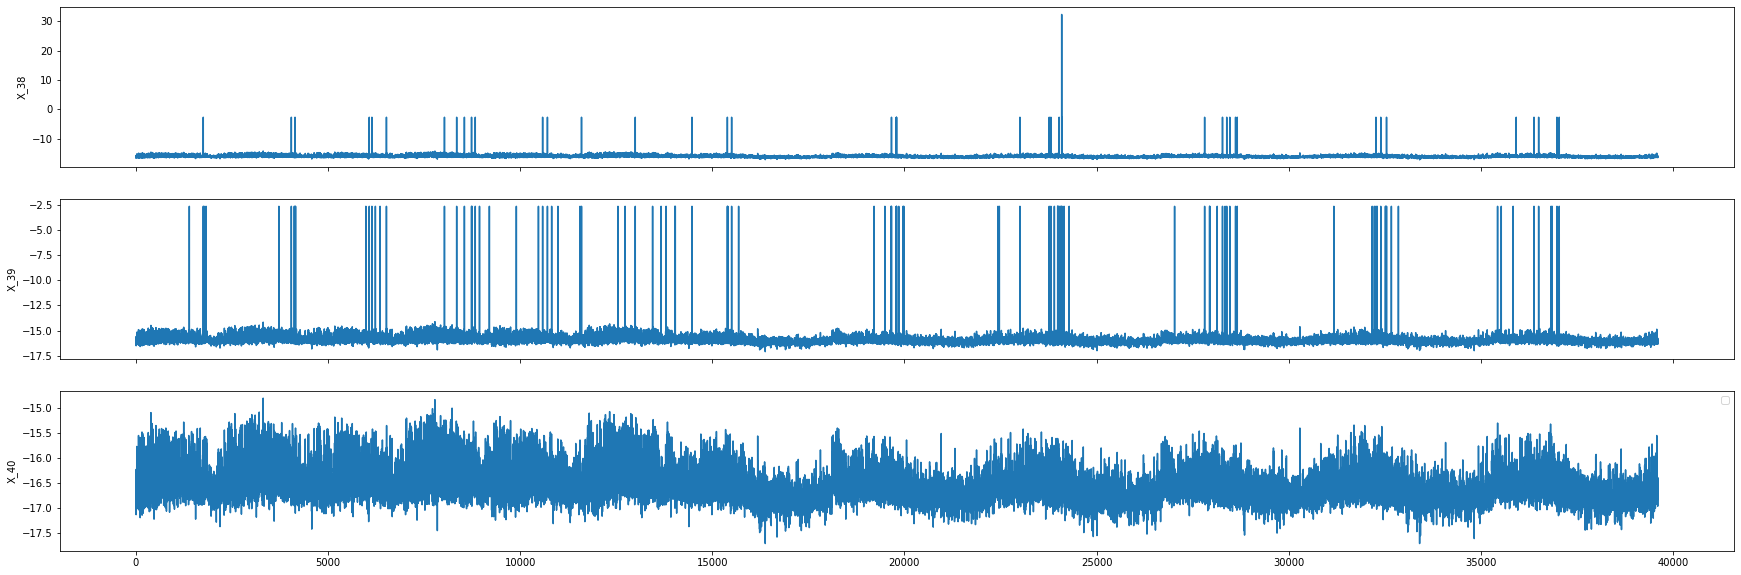

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,10), sharex=True)

ax1.plot(X_38_df)
ax1.set_ylabel('X_38')
ax2.plot(X_39_df)
ax2.set_ylabel('X_39')
ax3.plot(X_40_df)
ax3.set_ylabel('X_40')

plt.legend()
plt.show()
# 38과 39에서는 유사한 부분에서 이상치 발견, 40은 딱히 이상치는 없어보임

---
X_41 ~ X_44 레이돔 치수

In [128]:
X_41_df = train.loc[:,'X_41']
X_42_df = train.loc[:,'X_42']
X_43_df = train.loc[:,'X_43']
X_44_df = train.loc[:,'X_44']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


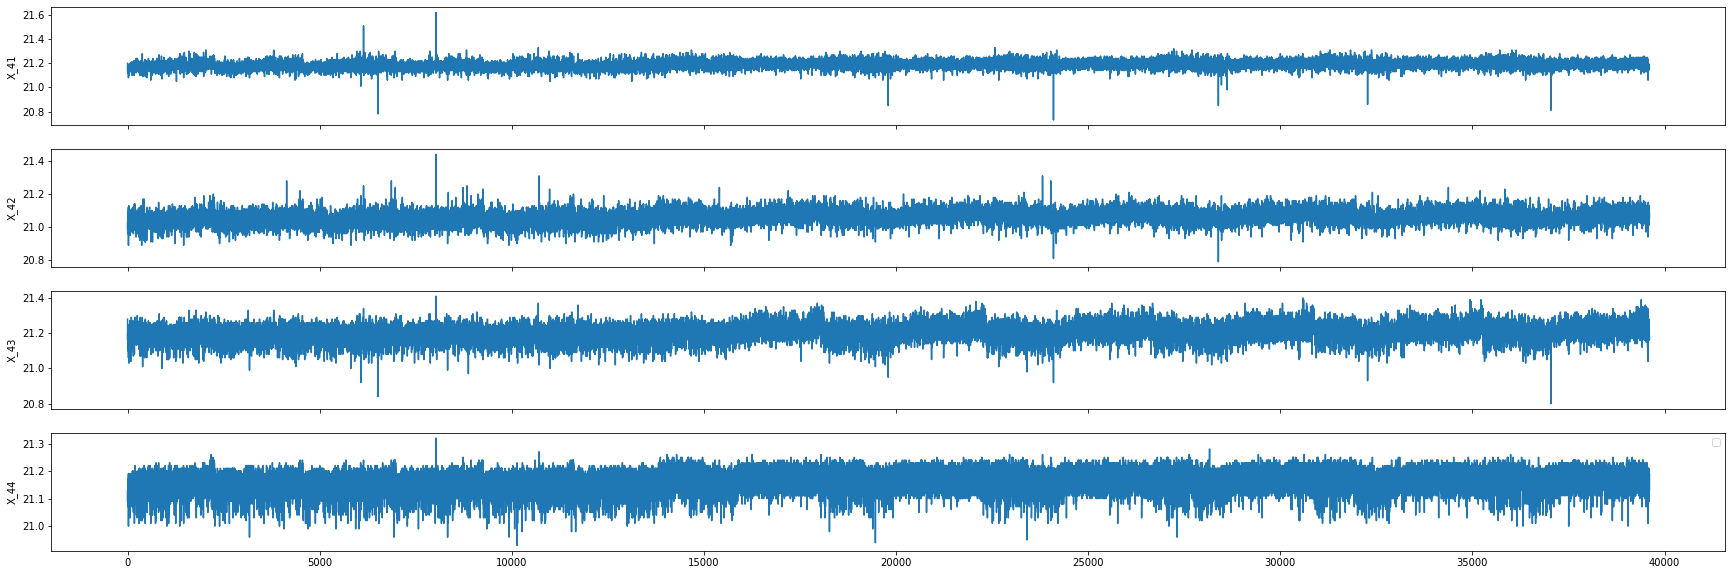

In [130]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30,10), sharex=True)

ax1.plot(X_41_df)
ax1.set_ylabel('X_41')
ax2.plot(X_42_df)
ax2.set_ylabel('X_42')
ax3.plot(X_43_df)
ax3.set_ylabel('X_43')
ax4.plot(X_44_df)
ax4.set_ylabel('X_44')

plt.legend()
plt.show()
# 41,42,43에서 약간의 이상치 발견

---
X_45 안테나 부분 레이돔 기울기

In [131]:
X_45_df = train.loc[:,'X_45']

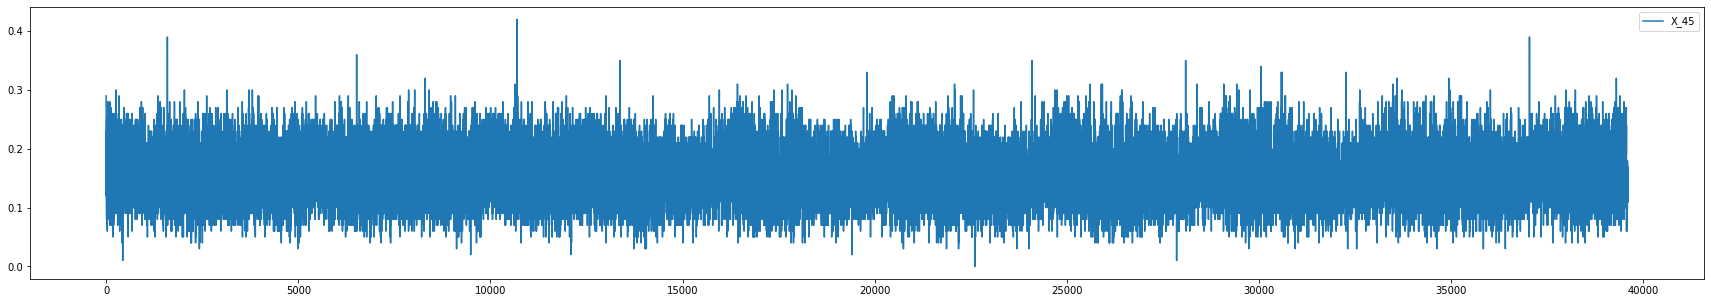

In [132]:
plt.figure(figsize=(30,5))
plt.plot(X_45_df, label='X_45') 
plt.legend()
plt.show()

---
X_46 실란트 본드 소요량

In [136]:
X_46_df = train.loc[:,'X_46']
X_46_df.describe()

count    39607.000000
mean      1468.275305
std          2.121517
min       1457.000000
25%       1469.000000
50%       1469.000000
75%       1469.000000
max       1469.000000
Name: X_46, dtype: float64

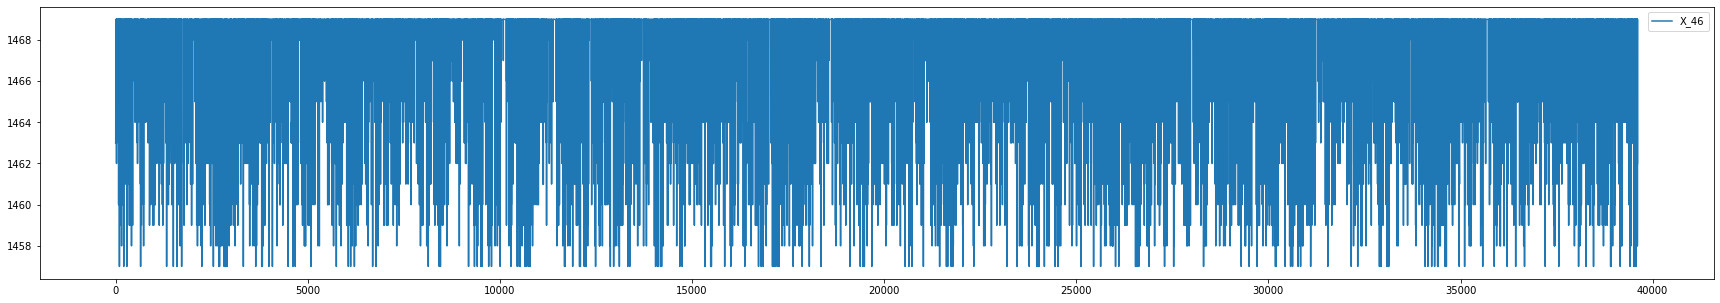

In [134]:
plt.figure(figsize=(30,5))
plt.plot(X_46_df, label='X_46') 
plt.legend()
plt.show()

(array([  377.,   259.,   305.,   308.,   365.,  1329.,   881.,   610.,
          389., 34784.]),
 array([1457. , 1458.2, 1459.4, 1460.6, 1461.8, 1463. , 1464.2, 1465.4,
        1466.6, 1467.8, 1469. ]),
 <BarContainer object of 10 artists>)

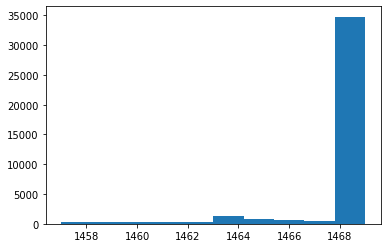

In [135]:
plt.hist(X_46_df)
# 

---
X_47 3차 검사 통과 여부

In [139]:
X_47_df = train.loc[:,'X_47']
X_48_df = train.loc[:,'X_48']

count    39607.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: X_47, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


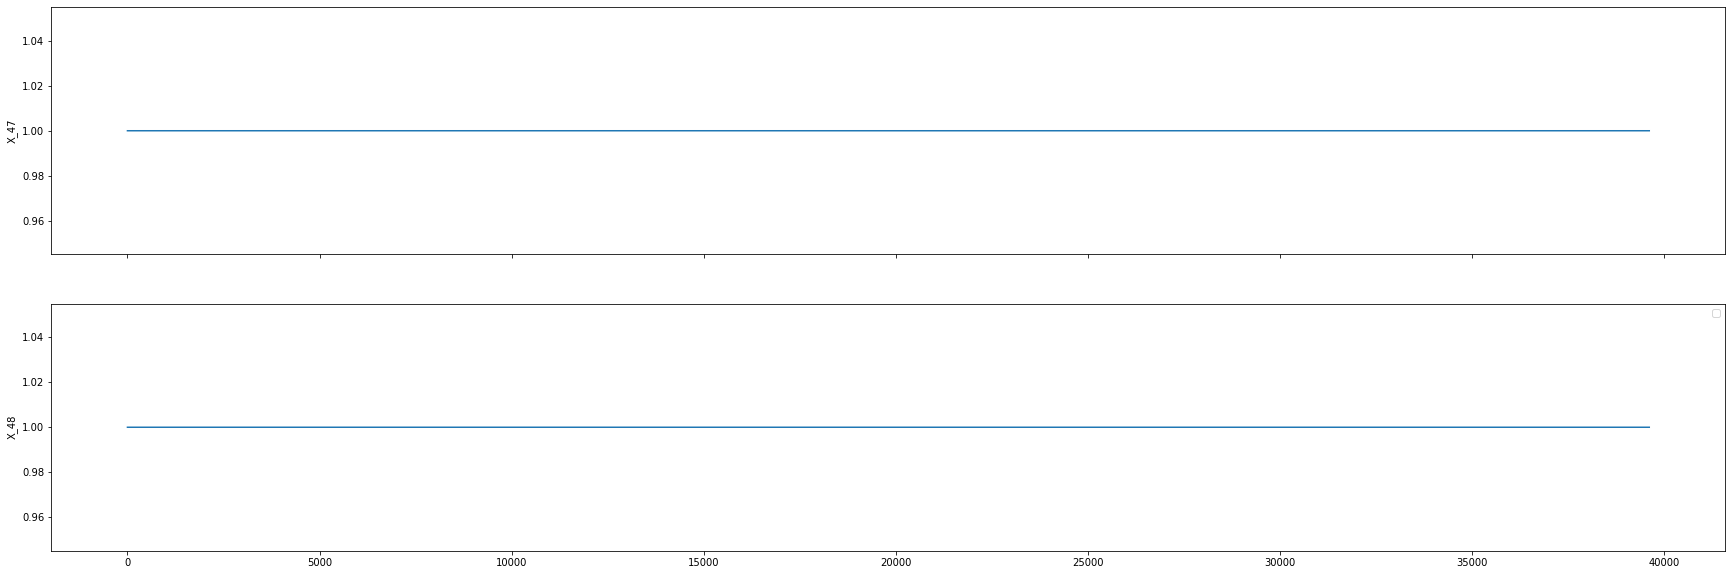

In [141]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,10), sharex=True)

ax1.plot(X_47_df)
ax1.set_ylabel('X_47')
ax2.plot(X_48_df)
ax2.set_ylabel('X_48')

plt.legend()
plt.show()
# 모두 통과

---
X_49 Cal 투입 전 대기 시간

In [142]:
X_49_df = train.loc[:,'X_49']
X_49_df.describe()

count     39607.000000
mean      16676.913639
std        8584.427420
min        3341.830000
25%       13093.930000
50%       15273.330000
75%       17560.180000
max      114563.630000
Name: X_49, dtype: float64

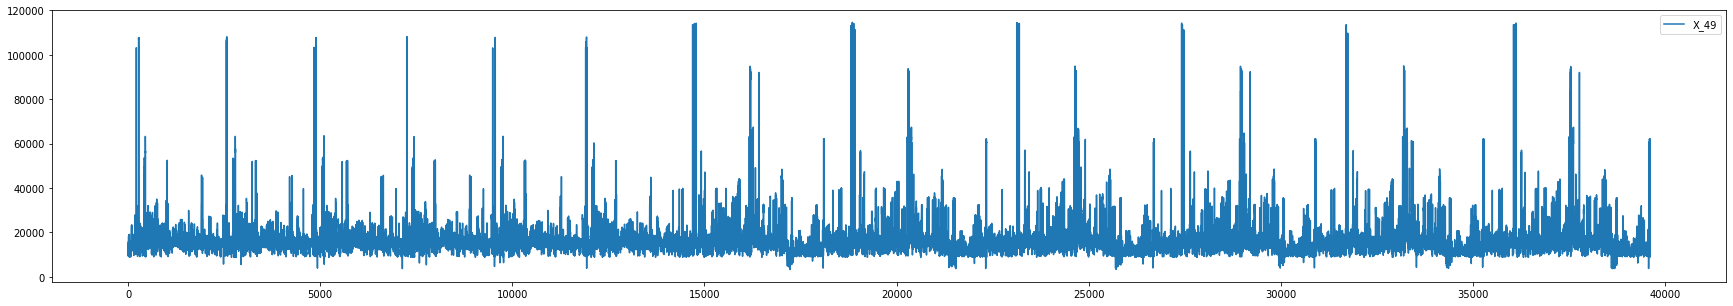

In [143]:
plt.figure(figsize=(30,5))
plt.plot(X_49_df, label='X_49') 
plt.legend()
plt.show()

(array([15854., 21359.,  1581.,   287.,   165.,   181.,     0.,    40.,
           37.,   103.]),
 array([  3341.83,  14464.01,  25586.19,  36708.37,  47830.55,  58952.73,
         70074.91,  81197.09,  92319.27, 103441.45, 114563.63]),
 <BarContainer object of 10 artists>)

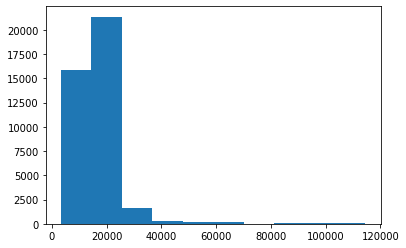

In [144]:
plt.hist(X_49_df)
# 편차 큼. 

---
X_50 ~ X_56 SMT 납 량

In [145]:
X_50_df = train.loc[:,'X_50']
X_51_df = train.loc[:,'X_51']
X_52_df = train.loc[:,'X_52']
X_53_df = train.loc[:,'X_53']
X_54_df = train.loc[:,'X_54']
X_55_df = train.loc[:,'X_55']
X_56_df = train.loc[:,'X_56']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


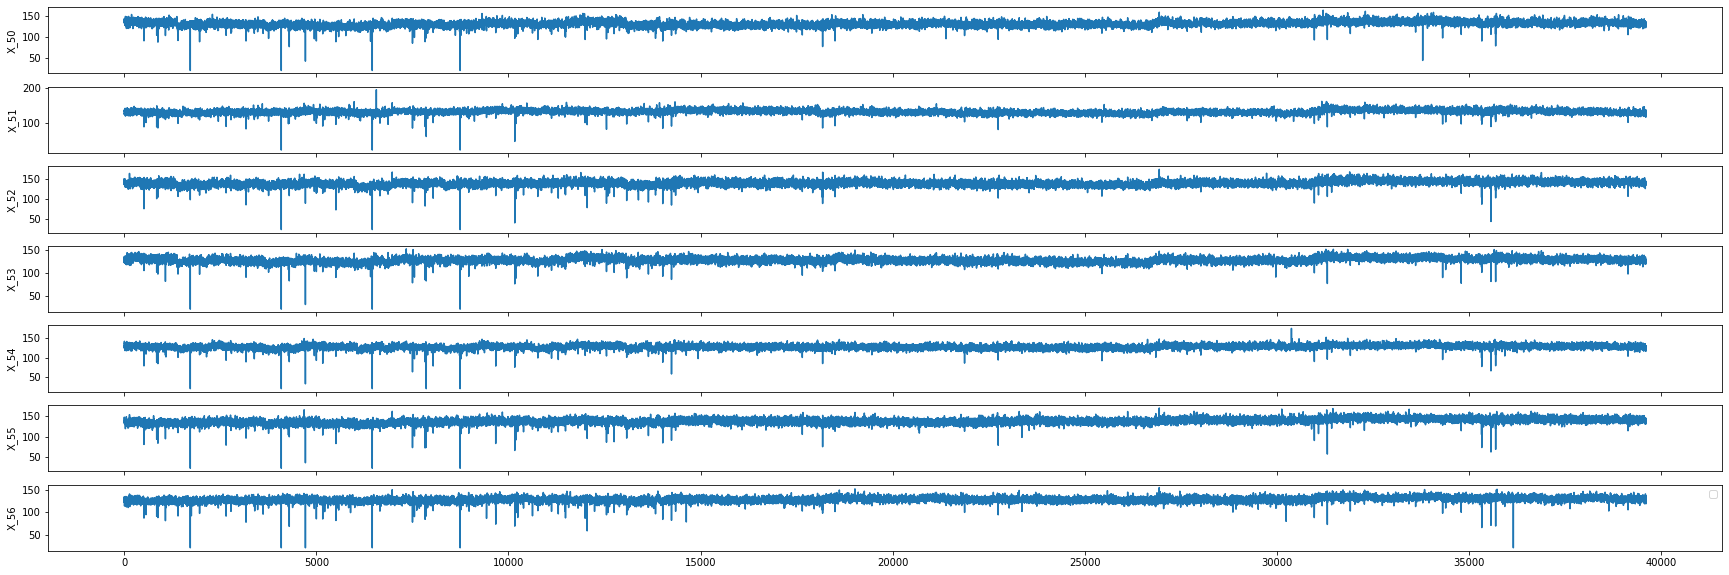

In [147]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(30,10), sharex=True)

ax1.plot(X_50_df)
ax1.set_ylabel('X_50')
ax2.plot(X_51_df)
ax2.set_ylabel('X_51')
ax3.plot(X_52_df)
ax3.set_ylabel('X_52')
ax4.plot(X_53_df)
ax4.set_ylabel('X_53')
ax5.plot(X_54_df)
ax5.set_ylabel('X_54')
ax6.plot(X_55_df)
ax6.set_ylabel('X_55')
ax7.plot(X_56_df)
ax7.set_ylabel('X_56')

plt.legend()
plt.show()
# 50~56 형태 유사함, 전부 평균내서 하나의 feature로 해도 되지 않을까?